In [18]:
import math

import matplotlib as mpl
mpl.rcParams['text.usetex'] = True 
mpl.rcParams['text.latex.preamble'] = r'\usepackage{libertine}' 
mpl.rc('font', family='serif')

import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib import rc

rc('text', usetex=True)
plt.style.use('seaborn-notebook')

plt.rcParams['axes.titlesize'] = '25'
plt.rcParams['axes.labelsize'] = '25'
plt.rcParams['legend.fontsize'] = '15'
plt.rcParams['xtick.labelsize'] = '15'
plt.rcParams['ytick.labelsize'] = '15'

In [19]:
masterdataGradual = pd.read_csv("../experiments/2019-03-25-03-22_BanditNonStaticGradual_/BanditNonStaticGradual.csv")
masterdataAbrupt = pd.read_csv("../experiments/2019-03-25-12-41_BanditNonStaticAbrupt_/BanditNonStaticAbrupt.csv")

In [20]:
sorted(masterdataGradual.bandit.unique())

['CUCB',
 'CUCB-ADWIN-0.1',
 'CUCBm',
 'Exp3.M',
 'Exp3.M-ADWIN-0.1',
 'IMP-TS',
 'MP-DTS; g=0.7',
 'MP-DTS; g=0.8',
 'MP-DTS; g=0.9',
 'MP-DTS; g=0.99',
 'MP-EG; e=0.7',
 'MP-EG; e=0.8',
 'MP-EG; e=0.9',
 'MP-EG; e=0.99',
 'MP-KLUCB',
 'MP-KLUCB-ADWIN-0.1',
 'MP-KLUCBPLUS',
 'MP-OTS',
 'MP-SWUCB; w=100',
 'MP-SWUCB; w=1000',
 'MP-SWUCB; w=50',
 'MP-SWUCB; w=500',
 'MP-TS',
 'MP-TS-ADWIN-0.001',
 'MP-TS-ADWIN-0.01',
 'MP-TS-ADWIN-0.1',
 'MP-TS-ADWIN-0.3',
 'MP-TS-ADWIN-0.5',
 'MP-TS-ADWIN-1.0',
 'OR',
 'OS']

In [21]:
masterdataGradual['reward/arm'] = masterdataGradual['gain']/masterdataGradual['k']
masterdataAbrupt['reward/arm'] = masterdataAbrupt['gain']/masterdataAbrupt['k']

In [22]:
masterdataGradual.groupby(["bandit", "scalingstrategy"])[['gain', 'k', 'reward/arm']].mean()

,,gain,k,reward/arm
bandit,scalingstrategy,,,
CUCB,KL-1-100-0.6,24.726488,44.848677,0.560693
CUCB-ADWIN-0.1,KL-1-100-0.6,26.560943,44.501982,0.584843
CUCBm,KL-1-100-0.6,24.689940,44.813154,0.560288
Exp3.M,KL-1-100-0.6,0.636209,1.518125,0.405912
Exp3.M-ADWIN-0.1,KL-1-100-0.6,3.597088,6.438885,0.409041
IMP-TS,KL-1-100-0.6,24.609571,44.734295,0.559532
MP-DTS; g=0.7,KL-1-100-0.6,18.308916,31.027095,0.537001
MP-DTS; g=0.8,KL-1-100-0.6,20.431909,34.376069,0.539417
MP-DTS; g=0.9,KL-1-100-0.6,22.628588,37.870255,0.544152


In [23]:
# Gradual

n = 100000
steps_gradual = np.array([((x+1)*n)/(61)for x in range(60)])

a = list(range(31))
b = list(range(30))
b.reverse()
stepstates = a + b

pullref_gradual = []
for x in range(n):
    currentstep = len(steps_gradual[steps_gradual < x])
    pullref_gradual = pullref_gradual + [80 - 2*stepstates[currentstep]]
    
top = 0.9966666666666667
low = 0.5016666666666666
expected_gains_gradual = []
for stepstate in stepstates: 
    expected_gains_gradual = expected_gains_gradual + [np.linspace(top-0.01*stepstate,low-0.01*stepstate,9901)]

In [24]:
# Abrupt

pullref_abrupt = np.concatenate([np.full(33333,80), np.full(33333,20), np.full(33334,80)])

n = 100000
steps_abrupt = np.array([((x+1)*n)/(3)for x in range(2)])
stepstates = [0,30,0]

top = 0.9966666666666667
low = 0.5016666666666666
expected_gains_abrupt = []
for stepstate in stepstates: 
    expected_gains_abrupt = expected_gains_abrupt + [np.linspace(top-0.01*stepstate,low-0.01*stepstate,9901)]

In [25]:
husl4 = sns.color_palette("husl", 4)
husl5 = sns.color_palette("husl", 5)
husl6 = sns.color_palette("husl", 7)
greens5 = sns.color_palette("Greens_r", 5)
purples5 = sns.color_palette("Purples_r", 7)
blues5 = sns.color_palette("Blues_r", 5)
reds5 = sns.color_palette("Reds_r", 8)
oranges5 = sns.color_palette("Oranges_r", 5)
greys5 = sns.color_palette("Greys_r", 5)
winter5 = sns.color_palette("viridis_r", 5)

In [26]:
plotkind = "small"

shortlist = ['MP-TS', 
             'MP-TS-ADWIN-0.1', 
             'MP-KLUCB',
             'MP-KLUCB-ADWIN-0.1',
             'Exp3.M', 
             'Exp3.M-ADWIN-0.1', 
             'CUCB', 
             'CUCB-ADWIN-0.1', 
             'OR', 
             'OS']

prettynames = {
    "CUCB": "S-CUCB",
    "CUCB-ADWIN-0.1": "S-CUCB-ADWIN",
    "Exp3.M": "S-Exp3.M",
    "Exp3.M-ADWIN-0.1": "S-Exp3.M-ADWIN",
    "MP-KLUCB": "S-KL-UCB",
    'MP-KLUCB-ADWIN-0.1': "S-KL-UCB-ADWIN",
    "MP-TS": "S-TS",
    "MP-TS-ADWIN-0.1": "S-TS-ADWIN",
    "OD": "S-DO",
    "OR": "S-RO",
    "OS": "S-SO",
}

styledictionary = {
    
    'MP-TS': {'marker': 'o', 'color': reds5[0], 'linestyle': "-"},
    'MP-TS-ADWIN-0.1': {'marker': 'o', 'color': reds5[0], 'linestyle': ":"},
    'MP-KLUCB': {'marker': '^', 'color': blues5[0], 'linestyle': "-"},
    'MP-KLUCB-ADWIN-0.1': {'marker': '^', 'color': blues5[0], 'linestyle': ":"},
    'Exp3.M' : {'marker': 's', 'color': purples5[0], 'linestyle': "-"},
    'Exp3.M-ADWIN-0.1' : {'marker': 's', 'color': purples5[0], 'linestyle': ":"},
    'CUCB': {'marker': 'D', 'color': greens5[0], 'linestyle': "-"},
    'CUCB-ADWIN-0.1': {'marker': 'D', 'color': greens5[0], 'linestyle': ":"},
    'OR': {'marker': '', 'color': husl5[2], 'linestyle': "-"},
    'OS': {'marker': '', 'color': oranges5[0], 'linestyle': "-"},
}

<IPython.core.display.Javascript object>


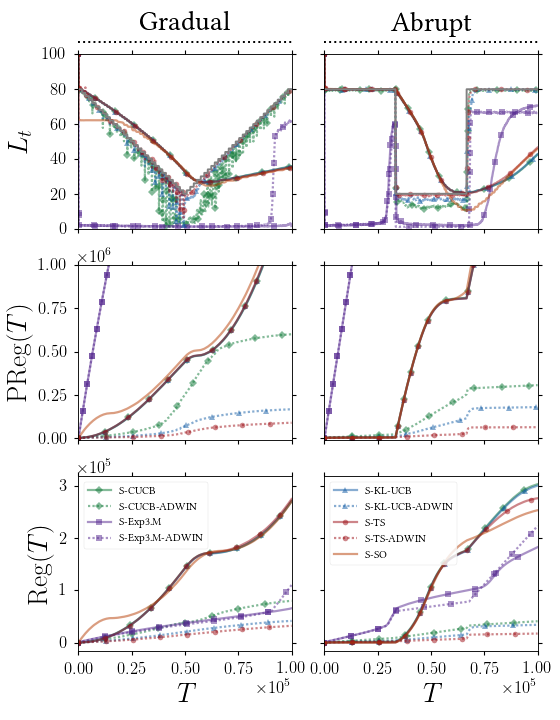

CUCB : 44.848676799998245
CUCB-ADWIN-0.1 : 44.50198249999947
Exp3.M : 1.5181246999999922
Exp3.M-ADWIN-0.1 : 6.438885199999956
MP-KLUCB : 44.81540780000097
MP-KLUCB-ADWIN-0.1 : 48.87059909999963
MP-TS : 44.708739799997794
MP-TS-ADWIN-0.1 : 49.684210200000564
OR : 1.365112399999896
OS : 41.81366950000785
CUCB : 50.8518211000022
CUCB-ADWIN-0.1 : 56.99993410000071
Exp3.M : 17.563754400000057
Exp3.M-ADWIN-0.1 : 24.042507499999996
MP-KLUCB : 50.92686890000345
MP-KLUCB-ADWIN-0.1 : 58.27945049999609
MP-TS : 51.4743234000019
MP-TS-ADWIN-0.1 : 59.444845700015094
OR : 1.5145131000000407
OS : 49.614743400001444


In [27]:
%matplotlib notebook

f, axarr = plt.subplots(3,2, figsize=(7,9), sharex=True, sharey='row')
axes = axarr.flatten()

plt.sca(axes[0])
data_grouped = masterdataGradual[[x in shortlist for x in masterdataGradual["bandit"]]].groupby("bandit")

for i,df in data_grouped:
    df = df.sort_values("iteration").reset_index()
    dff = df.iloc[df.index[::100]]
    name = df['bandit'][0]
    
    if(name in ["OD", "OR"]):
        pass # do not plot it 
    else:
        lw = 2
        if(styledictionary[name]['linestyle'] == ":"):
            dff['k'].plot(label=prettynames[name], linewidth=lw, linestyle=styledictionary[name]['linestyle'],
                                markevery=0.1, alpha=0.5, markersize=5, dashes=(1,1), #logx=True,
                               marker= styledictionary[name]['marker'], c=styledictionary[name]['color'])
        else:
            dff['k'].plot(label=prettynames[name], linewidth=lw, linestyle=styledictionary[name]['linestyle'],
                                markevery=0.1, alpha=0.5, markersize=5, #logx=True,
                               marker= styledictionary[name]['marker'], c=styledictionary[name]['color'])
    
    print("%s : %s"%(name, df['k'].mean()))

plt.plot(pullref_gradual, marker="", color="grey")
plt.tick_params(top=True, right=True)
plt.ylabel("$L_t$")

plt.ylim((0,100))
plt.title(r"Gradual", y=1.1)
plt.axhline(y=107, c="black", linestyle=":", clip_on=False)

##########################

plt.sca(axes[1])
data_grouped = masterdataAbrupt[[x in shortlist for x in masterdataAbrupt["bandit"]]].groupby("bandit")

for i,df in data_grouped:
    df = df.sort_values("iteration").reset_index()
    dff = df.iloc[df.index[::100]]
    #dff = df
    name = df['bandit'][0]
    
    if(name in ["OD", "OR"]):
        pass # do not plot it 
    else:
        lw = 2
        if(styledictionary[name]['linestyle'] == ":"):
            dff['k'].plot(label=prettynames[name], linewidth=lw, linestyle=styledictionary[name]['linestyle'],
                                markevery=0.1, alpha=0.5, markersize=5, dashes=(1,1), #logx=True,
                               marker= styledictionary[name]['marker'], c=styledictionary[name]['color'])
        else:
            dff['k'].plot(label=prettynames[name], linewidth=lw, linestyle=styledictionary[name]['linestyle'],
                                markevery=0.1, alpha=0.5, markersize=5, #logx=True,
                               marker= styledictionary[name]['marker'], c=styledictionary[name]['color'])
    
    print("%s : %s"%(name, df['k'].mean()))

plt.plot(pullref_abrupt, marker="", color="grey")
plt.tick_params(top=True, right=True)
plt.ylim((0,100))

plt.title(r"Abrupt", y=1.1)
plt.axhline(y=107, c="black", linestyle=":", clip_on=False)


######################
plt.sca(axes[2])

data_grouped = masterdataGradual[[x in shortlist for x in masterdataGradual["bandit"]]].groupby("bandit")

for i,df in data_grouped:
    ks = df.sort_values("iteration").reset_index().k
    regret = np.abs(pullref_gradual - ks)
    cumsum = regret.cumsum()
    name = df.iloc[0,0]
    if(name in ["OD", "OR"]):
        pass # do not plot it 
    else:
        lw = 2
        if(styledictionary[name]['linestyle'] == ":"):
            cumsum.plot(label=prettynames[name], linewidth=lw, linestyle=styledictionary[name]['linestyle'],
                                markevery=0.1, alpha=0.5, markersize=5, dashes=(1,1), #logx=True,
                               marker= styledictionary[name]['marker'], c=styledictionary[name]['color'])
        else:
            cumsum.plot(label=prettynames[name], linewidth=lw, linestyle=styledictionary[name]['linestyle'],
                    markevery=0.1, alpha=0.5, markersize=5, #logx=True,
                   marker= styledictionary[name]['marker'], c=styledictionary[name]['color'])

plt.tick_params(top=True, right=True)
plt.ylabel(r"$\mathrm{PReg}(T)$")
plt.ylim((-10000,1000000))


plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))

##################################

plt.sca(axes[3])

data_grouped = masterdataAbrupt[[x in shortlist for x in masterdataAbrupt["bandit"]]].groupby("bandit")

for i,df in data_grouped:
    ks = df.sort_values("iteration").reset_index().k
    regret = np.abs(pullref_abrupt - ks)
    cumsum = regret.cumsum()
    name = df.iloc[0,0]
    if(name in ["OD", "OR"]):
        pass # do not plot it 
    else:
        lw = 2
        if(styledictionary[name]['linestyle'] == ":"):
            cumsum.plot(label=prettynames[name], linewidth=lw, linestyle=styledictionary[name]['linestyle'],
                                markevery=0.1, alpha=0.5, markersize=5, dashes=(1,1), #logx=True,
                               marker= styledictionary[name]['marker'], c=styledictionary[name]['color'])
        else:
            cumsum.plot(label=prettynames[name], linewidth=lw, linestyle=styledictionary[name]['linestyle'],
                    markevery=0.1, alpha=0.5, markersize=5, #logx=True,
                   marker= styledictionary[name]['marker'], c=styledictionary[name]['color'])
    
plt.tick_params(top=True, right=True)
plt.ylim((-10000,1000000))


plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))

##########################################

plt.sca(axes[4])

data_grouped = masterdataGradual[[x in shortlist for x in masterdataGradual["bandit"]]].groupby("bandit")

for i,df in data_grouped:
    cumsum = df.sort_values("iteration").reset_index().gain.cumsum()
    name = df.iloc[0,0]
    
    ks = df.sort_values("iteration").reset_index().k
    it = df.sort_values("iteration").reset_index().iteration
    
    currentsteps = []
    for x in it:
        currentsteps = currentsteps + [len(steps_gradual[steps_gradual < x])]
    
    gains = df.sort_values("iteration").reset_index().gain
    regret = [expected_gains_gradual[s][int((x-1)*100)]*x for s,x in zip(currentsteps, ks)] - gains
    cumsum = regret.cumsum()
    
    if(name in ["OD", "OR"]):
        pass # do not plot it 
    else:
        if(name in ["OS", "MP-TS-ADWIN-0.1", "MP-TS", "MP-KLUCB", "MP-KLUCB-ADWIN-0.1"]):
            label= '_nolegend_'
        else:
            label = prettynames[name] 
            
        lw = 2
        if(styledictionary[name]['linestyle'] == ":"):
            cumsum.plot(label=label, linewidth=lw, linestyle=styledictionary[name]['linestyle'],
                                markevery=0.1, alpha=0.5, markersize=5, dashes=(1,1), #logx=True,
                               marker= styledictionary[name]['marker'], c=styledictionary[name]['color'])
        else:
            cumsum.plot(label=label, linewidth=lw, linestyle=styledictionary[name]['linestyle'],
                    markevery=0.1, alpha=0.5, markersize=5, #logx=True,
                   marker= styledictionary[name]['marker'], c=styledictionary[name]['color'])
    
    
plt.legend(fontsize = 10, ncol=1, loc='best')
plt.tick_params(top=True, right=True)
plt.ylabel(r"$\mathrm{Reg}(T)$")
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
    
plt.xlabel("$T$")


####################################

plt.sca(axes[5])

data_grouped = masterdataAbrupt[[x in shortlist for x in masterdataAbrupt["bandit"]]].groupby("bandit")

for i,df in data_grouped:
    cumsum = df.sort_values("iteration").reset_index().gain.cumsum()
    name = df.iloc[0,0]
    
    ks = df.sort_values("iteration").reset_index().k
    it = df.sort_values("iteration").reset_index().iteration
    
    currentsteps = []
    for x in it:
        currentsteps = currentsteps + [len(steps_abrupt[steps_abrupt < x])]
    
    gains = df.sort_values("iteration").reset_index().gain
    regret = [expected_gains_abrupt[s][int((x-1)*100)]*x for s,x in zip(currentsteps, ks)] - gains
    cumsum = regret.cumsum()
    
    if(name in ["OD", "OR"]):
        pass # do not plot it 
    else:
        if(name in ["OS", "MP-TS-ADWIN-0.1", "MP-TS", "MP-KLUCB", "MP-KLUCB-ADWIN-0.1"]):
            label=prettynames[name]
        else:
            label = '_nolegend_'
        
        lw = 2
        if(styledictionary[name]['linestyle'] == ":"):
            cumsum.plot(label=label, linewidth=lw, linestyle=styledictionary[name]['linestyle'],
                                markevery=0.1, alpha=0.5, markersize=5, dashes=(1,1), #logx=True,
                               marker= styledictionary[name]['marker'], c=styledictionary[name]['color'])
        else:
            cumsum.plot(label=label, linewidth=lw, linestyle=styledictionary[name]['linestyle'],
                    markevery=0.1, alpha=0.5, markersize=5, #logx=True,
                   marker= styledictionary[name]['marker'], c=styledictionary[name]['color'])
    
    
plt.legend(fontsize = 10, ncol=1, loc='best')
plt.tick_params(top=True, right=True)
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
    
plt.xlabel("$T$")

############################################

plt.tight_layout()

plt.savefig("gradual_abrupt_%s.pdf"%(plotkind))

In [28]:
plotkind = "long"

shortlist = [
 'MP-DTS; g=0.7',
 'MP-DTS; g=0.8',
 'MP-DTS; g=0.9',
 'MP-DTS; g=0.99',
 'MP-EG; e=0.7',
 'MP-EG; e=0.8',
 'MP-EG; e=0.9',
 'MP-EG; e=0.99',
 'MP-SWUCB; w=100',
 'MP-SWUCB; w=1000',
 'MP-SWUCB; w=50',
 'MP-SWUCB; w=500',
 'MP-TS-ADWIN-0.001',
 'MP-TS-ADWIN-0.01',
 'MP-TS-ADWIN-0.1',
 'MP-TS-ADWIN-0.3',
 'MP-TS-ADWIN-0.5',
 'MP-TS-ADWIN-1.0'
]

prettynames = {
    "CUCB": "S-CUCB",
    "Exp3.M": "S-Exp3.M",
    "MP-KLUCB": "S-KL-UCB",
    "MP-TS": "S-TS",
    "OD": "Oracle (Dynamic)",
    "OR": "Oracle (Random)",
    "OS": "S-OS",
    
    'MP-KLUCB-ADWIN-0.1':'S-KL-UCB-ADWIN; $\delta=0.1$',
    "Exp3.M-ADWIN-0.1": "S-Exp3.M-ADWIN; $\delta=0.1$",
    'CUCB-ADWIN-0.1':"S-CUCB-ADWIN; $\delta=0.1$",
    
    'MP-DTS; g=0.7': "S-dTS; $\gamma=0.7$",
    'MP-DTS; g=0.8': "S-dTS; $\gamma=0.8$",
    'MP-DTS; g=0.9': "S-dTS; $\gamma=0.9$",
    'MP-DTS; g=0.99': "S-dTS; $\gamma=0.99$",
    'MP-EG; e=0.7': "S-EG; $\epsilon=0.7$",
    'MP-EG; e=0.8': "S-EG; $\epsilon=0.8$",
    'MP-EG; e=0.9': "S-EG; $\epsilon=0.9$",
    'MP-EG; e=0.99': "S-EG; $\epsilon=0.99$",
    
    
    'MP-SWUCB; w=50':'S-SW-UCB; $w=50$',
    'MP-SWUCB; w=100':'S-SW-UCB; $w=100$',
    'MP-SWUCB; w=500':'S-SW-UCB; $w=500$',
    'MP-SWUCB; w=1000':'S-SW-UCB; $w=1000$',
    
    'MP-TS-ADWIN-0.001': "S-TS-ADWIN; $\delta=0.001$",
    'MP-TS-ADWIN-0.01': "S-TS-ADWIN; $\delta=0.01$",
    "MP-TS-ADWIN-0.1": "S-TS-ADWIN; $\delta=0.1$",
    'MP-TS-ADWIN-0.3': "S-TS-ADWIN; $\delta=0.3$",
    'MP-TS-ADWIN-0.5': "S-TS-ADWIN; $\delta=0.5$",
    'MP-TS-ADWIN-1.0': "S-TS-ADWIN; $\delta=1.0$",
}

styledictionary = {
     'MP-DTS; g=0.7': {'marker': 'p', 'color': blues5[0], 'linestyle': "-"},
     'MP-DTS; g=0.8': {'marker': 'p', 'color': blues5[1], 'linestyle': "-"},
     'MP-DTS; g=0.9': {'marker': 'p', 'color': blues5[2], 'linestyle': "-"},  
     'MP-DTS; g=0.99': {'marker': 'p', 'color': blues5[3], 'linestyle': "-"},
    
     'MP-EG; e=0.7': {'marker': 'P', 'color': purples5[0], 'linestyle': "-"},
     'MP-EG; e=0.8': {'marker': 'P', 'color': purples5[1], 'linestyle': "-"},
     'MP-EG; e=0.9': {'marker': 'P', 'color': purples5[2], 'linestyle': "-"},
     'MP-EG; e=0.99': {'marker': 'P', 'color': purples5[3], 'linestyle': "-"},

     'MP-SWUCB; w=50': {'marker': 's', 'color': greens5[0], 'linestyle': "-"},
     'MP-SWUCB; w=100': {'marker': 's', 'color': greens5[1], 'linestyle': "-"},
     'MP-SWUCB; w=500': {'marker': 's', 'color': greens5[2], 'linestyle': "-"},
     'MP-SWUCB; w=1000': {'marker': 's', 'color': greens5[3], 'linestyle': "-"},
     
    
     'MP-TS-ADWIN-0.001': {'marker': 'o', 'color': reds5[5], 'linestyle': "-"},
     'MP-TS-ADWIN-0.01': {'marker': 'o', 'color': reds5[4], 'linestyle': "-"},
     'MP-TS-ADWIN-0.1': {'marker': 'o', 'color': reds5[3], 'linestyle': "-"},
     'MP-TS-ADWIN-0.3': {'marker': 'o', 'color': reds5[2], 'linestyle': "-"},
     'MP-TS-ADWIN-0.5': {'marker': 'o', 'color': reds5[1], 'linestyle': "-"},
     'MP-TS-ADWIN-1.0': {'marker': 'o', 'color': reds5[0], 'linestyle': "-"},
    
     'OR': {'marker': '', 'color': husl5[2], 'linestyle': "-"},
     'OS': {'marker': '', 'color': oranges5[0], 'linestyle': "-"},
}

In [29]:
data_grouped.mean().index

Index(['CUCB', 'CUCB-ADWIN-0.1', 'Exp3.M', 'Exp3.M-ADWIN-0.1', 'MP-KLUCB',
       'MP-KLUCB-ADWIN-0.1', 'MP-TS', 'MP-TS-ADWIN-0.1', 'OR', 'OS'],
      dtype='object', name='bandit')

In [30]:
customorderalgs = ['MP-DTS; g=0.7','MP-DTS; g=0.8', 'MP-DTS; g=0.9', 'MP-DTS; g=0.99', 
 'MP-EG; e=0.7','MP-EG; e=0.8', 'MP-EG; e=0.9', 'MP-EG; e=0.99', 
 'MP-SWUCB; w=50', 'MP-SWUCB; w=100', 'MP-SWUCB; w=500', 'MP-SWUCB; w=1000',
 'MP-TS-ADWIN-0.001', 'MP-TS-ADWIN-0.01',
 'MP-TS-ADWIN-0.1', 'MP-TS-ADWIN-0.3', 'MP-TS-ADWIN-0.5',
 'MP-TS-ADWIN-1.0']

<IPython.core.display.Javascript object>


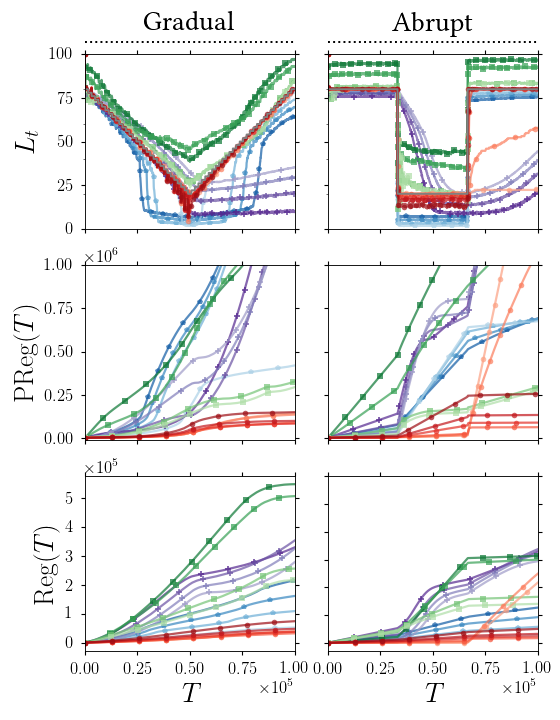

In [31]:
%matplotlib notebook

f, axarr = plt.subplots(3,2, figsize=(7,9), sharex=True, sharey='row')
axes = axarr.flatten()

plt.sca(axes[0])

for alg in customorderalgs:
    df = masterdataGradual[masterdataGradual["bandit"] == alg]
    df = df.sort_values("iteration").reset_index()
    dff = df.iloc[df.index[::100]]
    name = df['bandit'][0]
    
    if(name in ["OD", "OR"]):
        pass # do not plot it 
    else:
        lw = 2
        if(styledictionary[name]['linestyle'] == ":"):
            dff['k'].plot(label=prettynames[name], linewidth=lw, linestyle=styledictionary[name]['linestyle'],
                                markevery=0.1, alpha=0.7, markersize=5, dashes=(1,1), #logx=True,
                               marker= styledictionary[name]['marker'], c=styledictionary[name]['color'])
        else:
            dff['k'].plot(label=prettynames[name], linewidth=lw, linestyle=styledictionary[name]['linestyle'],
                                markevery=0.1, alpha=0.7, markersize=5, #logx=True,
                               marker= styledictionary[name]['marker'], c=styledictionary[name]['color'])

plt.plot(pullref_gradual, marker="", color="grey")
plt.tick_params(top=True, right=True)
plt.ylabel("$L_t$")
plt.yticks([0,25,50,75,100])

plt.ylim((0,100))
plt.title(r"Gradual", y=1.1)
plt.axhline(y=107, c="black", linestyle=":", clip_on=False)

##########################

plt.sca(axes[1])

for alg in customorderalgs:
    df = masterdataAbrupt[masterdataAbrupt["bandit"] == alg]
    df = df.sort_values("iteration").reset_index()
    dff = df.iloc[df.index[::100]]
    #dff = df
    name = df['bandit'][0]
    
    if(name in ["OD", "OR"]):
        pass # do not plot it 
    else:
        lw = 2
        if(styledictionary[name]['linestyle'] == ":"):
            dff['k'].plot(label=prettynames[name], linewidth=lw, linestyle=styledictionary[name]['linestyle'],
                                markevery=0.1, alpha=0.7, markersize=5, dashes=(1,1), #logx=True,
                               marker= styledictionary[name]['marker'], c=styledictionary[name]['color'])
        else:
            dff['k'].plot(label=prettynames[name], linewidth=lw, linestyle=styledictionary[name]['linestyle'],
                                markevery=0.1, alpha=0.7, markersize=5, #logx=True,
                               marker= styledictionary[name]['marker'], c=styledictionary[name]['color'])
    
plt.plot(pullref_abrupt, marker="", color="grey")
plt.tick_params(top=True, right=True)
plt.yticks([0,25,50,75,100])

plt.ylim((0,100))
plt.title(r"Abrupt", y=1.1)
plt.axhline(y=107, c="black", linestyle=":", clip_on=False)

######################
plt.sca(axes[2])

for alg in customorderalgs:
    df = masterdataGradual[masterdataGradual["bandit"] == alg]
    ks = df.sort_values("iteration").reset_index().k
    regret = np.abs(pullref_gradual - ks)
    cumsum = regret.cumsum()
    name = df.iloc[0,0]
    if(name in ["OD", "OR"]):
        pass # do not plot it 
    else:
        lw = 2
        if(styledictionary[name]['linestyle'] == ":"):
            cumsum.plot(label=prettynames[name], linewidth=lw, linestyle=styledictionary[name]['linestyle'],
                                markevery=0.1, alpha=0.7, markersize=5, dashes=(1,1), #logx=True,
                               marker= styledictionary[name]['marker'], c=styledictionary[name]['color'])
        else:
            cumsum.plot(label=prettynames[name], linewidth=lw, linestyle=styledictionary[name]['linestyle'],
                    markevery=0.1, alpha=0.7, markersize=5, #logx=True,
                   marker= styledictionary[name]['marker'], c=styledictionary[name]['color'])
    
plt.tick_params(top=True, right=True)
plt.ylabel(r"$\mathrm{PReg}(T)$")
plt.yticks([0,250000,500000,750000,1000000])
plt.ylim((-10000,1000000))

plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))

##################################

plt.sca(axes[3])

for alg in customorderalgs:
    df = masterdataAbrupt[masterdataAbrupt["bandit"] == alg]
    ks = df.sort_values("iteration").reset_index().k
    regret = np.abs(pullref_abrupt - ks)
    cumsum = regret.cumsum()
    name = df.iloc[0,0]
    if(name in ["OD", "OR"]):
        pass # do not plot it 
    else:
        lw = 2
        if(styledictionary[name]['linestyle'] == ":"):
            cumsum.plot(label=prettynames[name], linewidth=lw, linestyle=styledictionary[name]['linestyle'],
                                markevery=0.1, alpha=0.7, markersize=5, dashes=(1,1), #logx=True,
                               marker= styledictionary[name]['marker'], c=styledictionary[name]['color'])
        else:
            cumsum.plot(label=prettynames[name], linewidth=lw, linestyle=styledictionary[name]['linestyle'],
                    markevery=0.1, alpha=0.7, markersize=5, #logx=True,
                   marker= styledictionary[name]['marker'], c=styledictionary[name]['color'])
    
plt.tick_params(top=True, right=True)
plt.ylim((-10000,1000000))
plt.yticks([0,250000,500000,750000,1000000])

plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))

##########################################

plt.sca(axes[4])

for alg in customorderalgs:
    df = masterdataGradual[masterdataGradual["bandit"] == alg]
    name = df.iloc[0,0]
    
    ks = df.sort_values("iteration").reset_index().k
    it = df.sort_values("iteration").reset_index().iteration
    
    currentsteps = []
    for x in it:
        currentsteps = currentsteps + [len(steps_gradual[steps_gradual < x])]
    
    gains = df.sort_values("iteration").reset_index().gain
    regret = [expected_gains_gradual[s][int((x-1)*100)]*x for s,x in zip(currentsteps, ks)] - gains
    cumsum = regret.cumsum()
    
    if(name in ["OD", "OR"]):
        pass # do not plot it 
    else:
        lw = 2
        if(styledictionary[name]['linestyle'] == ":"):
            cumsum.plot(label=prettynames[name], linewidth=lw, linestyle=styledictionary[name]['linestyle'],
                                markevery=0.1, alpha=0.7, markersize=5, dashes=(1,1), #logx=True,
                               marker= styledictionary[name]['marker'], c=styledictionary[name]['color'])
        else:
            cumsum.plot(label=prettynames[name], linewidth=lw, linestyle=styledictionary[name]['linestyle'],
                    markevery=0.1, alpha=0.7, markersize=5, #logx=True,
                   marker= styledictionary[name]['marker'], c=styledictionary[name]['color'])
    

plt.tick_params(top=True, right=True)
plt.ylabel(r"$\mathrm{Reg}(T)$")
plt.yticks([0,100000,200000,300000])

plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
    
plt.xlabel("$T$")

####################################

plt.sca(axes[5])

for alg in customorderalgs:
    df = masterdataAbrupt[masterdataAbrupt["bandit"] == alg]
    cumsum = df.sort_values("iteration").reset_index().gain.cumsum()
    name = df.iloc[0,0]
    
    ks = df.sort_values("iteration").reset_index().k
    it = df.sort_values("iteration").reset_index().iteration
    
    currentsteps = []
    for x in it:
        currentsteps = currentsteps + [len(steps_abrupt[steps_abrupt < x])]
    
    gains = df.sort_values("iteration").reset_index().gain
    regret = [expected_gains_abrupt[s][int((x-1)*100)]*x for s,x in zip(currentsteps, ks)] - gains
    cumsum = regret.cumsum()
    
    if(name in ["OD", "OR"]):
        pass # do not plot it 
    else:
        lw = 2
        if(styledictionary[name]['linestyle'] == ":"):
            cumsum.plot(label=prettynames[name], linewidth=lw, linestyle=styledictionary[name]['linestyle'],
                                markevery=0.1, alpha=0.7, markersize=5, dashes=(1,1), #logx=True,
                               marker= styledictionary[name]['marker'], c=styledictionary[name]['color'])
        else:
            cumsum.plot(label=prettynames[name], linewidth=lw, linestyle=styledictionary[name]['linestyle'],
                    markevery=0.1, alpha=0.7, markersize=5, #logx=True,
                   marker= styledictionary[name]['marker'], c=styledictionary[name]['color'])
    
plt.tick_params(top=True, right=True)
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
    
plt.xlabel("$T$")
plt.yticks([0,100000,200000,300000,400000,500000,600000])

plt.tight_layout()

plt.savefig("gradual_abrupt_%s.pdf"%(plotkind))

### This is just for the legend, which we take separately

<IPython.core.display.Javascript object>


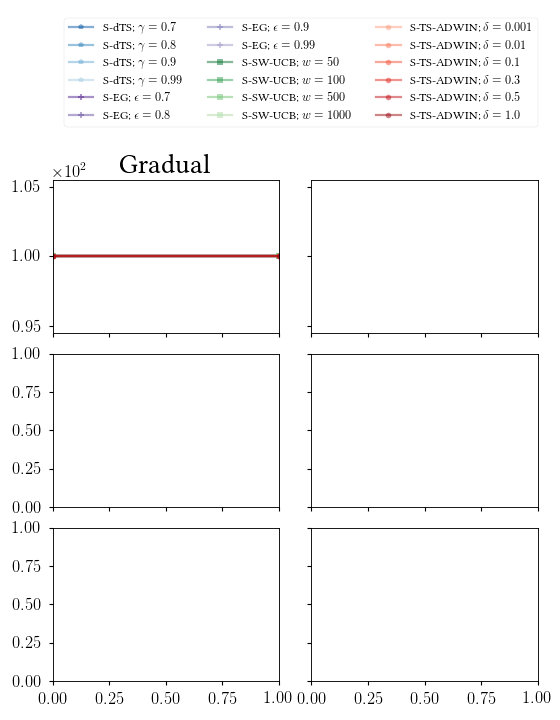

In [17]:
%matplotlib notebook

f, axarr = plt.subplots(3,2, figsize=(7,9), sharex=True, sharey='row')
axes = axarr.flatten()

plt.sca(axes[0])

for alg in customorderalgs:
    df = masterdataGradual[masterdataGradual["bandit"] == alg]
    df = df.sort_values("iteration").reset_index()
    dff = df.iloc[[0,1]]
    name = df['bandit'][0]
    
    if(name in ["OD", "OR"]):
        pass # do not plot it 
    else:
        lw = 2
        if(styledictionary[name]['linestyle'] == ":"):
            dff['k'].plot(label=prettynames[name], linewidth=lw, linestyle=styledictionary[name]['linestyle'],
                                markevery=0.1, alpha=0.5, markersize=5, dashes=(1,1),
                               marker= styledictionary[name]['marker'], c=styledictionary[name]['color'])
        else:
            dff['k'].plot(label=prettynames[name], linewidth=lw, linestyle=styledictionary[name]['linestyle'],
                                markevery=0.1, alpha=0.5, markersize=5,
                               marker= styledictionary[name]['marker'], c=styledictionary[name]['color'])

plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))

plt.title("Gradual")

plt.legend(ncol=3, fontsize=11, loc='upper center', bbox_to_anchor=(1.1, 2.1))

plt.tight_layout()
plt.subplots_adjust(top=0.75)

plt.savefig("legend_%s.pdf"%(plotkind))plt.legend(fontsize = 10, ncol=1, loc='upper left')